# Daria Bromot - FS500047
## Wikipedia Text Games Exercise

In [13]:
import nltk
nltk.download('punkt')
import re
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Roboto']
import collections
from collections import Counter, defaultdict  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bromotdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# First let's get the contents of the webpage, as raw html
link = "https://en.wikipedia.org/wiki/Data_science"
f = requests.get(link)
html = f.text
html

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-

In [15]:
# Now let's strip the html tags, and keep the page text
def html2text(html):
    soup = BeautifulSoup(html, "lxml")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    lines = [line.strip() for line in text.splitlines()]
    # drop blank lines
    text = [line for line in lines if line]

    return text

In [16]:
text = html2text(html)
text

['Data science - Wikipedia',
 'Jump to content',
 'Main menu',
 'Main menu',
 'move to sidebar',
 'hide',
 'Navigation',
 'Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate',
 'Contribute',
 'HelpLearn to editCommunity portalRecent changesUpload file',
 'Languages',
 'Language links are at the top of the page across from the title.',
 'Search',
 'Create accountLog in',
 'Personal tools',
 'Create account Log in',
 'Pages for logged out editors learn more',
 'ContributionsTalk',
 'Contents',
 'move to sidebar',
 'hide',
 '(Top)',
 '1Foundations',
 'Toggle Foundations subsection',
 '1.1Relationship to statistics',
 '2Etymology',
 'Toggle Etymology subsection',
 '2.1Early usage',
 '2.2Modern usage',
 '3See also',
 '4References',
 'Toggle the table of contents',
 'Toggle the table of contents',
 'Data science',
 '44 languages',
 'العربيةAzərbaycancaবাংলাБългарскиCatalàČeštinaDeutschEestiΕλληνικάEspañolEsperantoEuskaraفارسیFrançais한국어Հայերենहिन्दीBahasa IndonesiaI

Create a histogram for the words in the text. What is the most common word?

In [17]:
import re

def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        words = re.findall(r'\b[a-zA-Z]{2,}\b|\ba\b', sentence)
        tokenized_sentences.extend(words)
    return tokenized_sentences

text_clean=tokenize_sentences(text)
text_clean

['data',
 'science',
 'wikipedia',
 'jump',
 'to',
 'content',
 'main',
 'menu',
 'main',
 'menu',
 'move',
 'to',
 'sidebar',
 'hide',
 'navigation',
 'main',
 'pagecontentscurrent',
 'eventsrandom',
 'articleabout',
 'wikipediacontact',
 'usdonate',
 'contribute',
 'helplearn',
 'to',
 'editcommunity',
 'portalrecent',
 'changesupload',
 'file',
 'languages',
 'language',
 'links',
 'are',
 'at',
 'the',
 'top',
 'of',
 'the',
 'page',
 'across',
 'from',
 'the',
 'title',
 'search',
 'create',
 'accountlog',
 'in',
 'personal',
 'tools',
 'create',
 'account',
 'log',
 'in',
 'pages',
 'for',
 'logged',
 'out',
 'editors',
 'learn',
 'more',
 'contributionstalk',
 'contents',
 'move',
 'to',
 'sidebar',
 'hide',
 'top',
 'toggle',
 'foundations',
 'subsection',
 'to',
 'statistics',
 'toggle',
 'etymology',
 'subsection',
 'usage',
 'usage',
 'also',
 'toggle',
 'the',
 'table',
 'of',
 'contents',
 'toggle',
 'the',
 'table',
 'of',
 'contents',
 'data',
 'science',
 'languages',
 

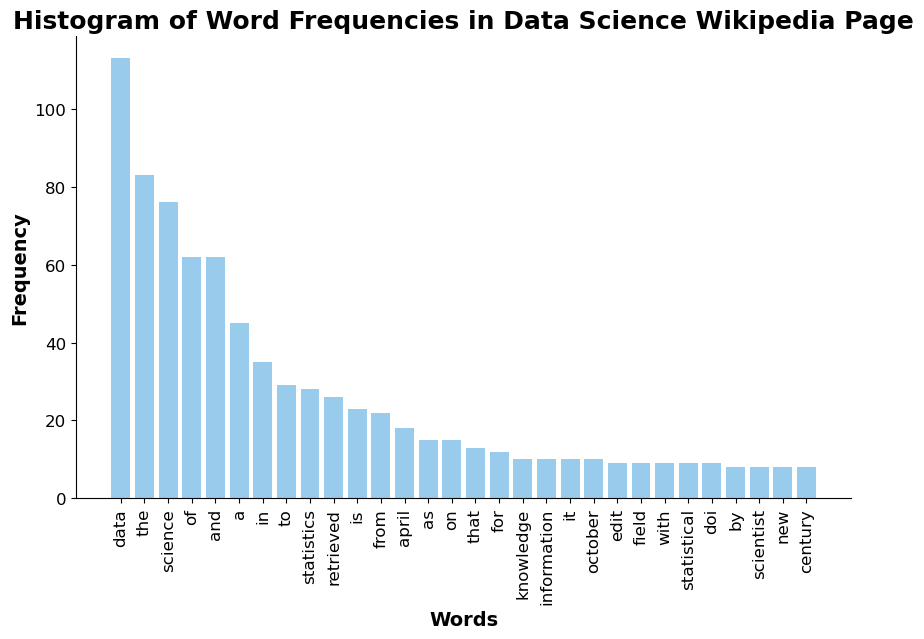

In [19]:
# Count the occurrences of each word using the Counter class from the collections module
word_counts = Counter(text_clean)
# Sort the words by their frequency of occurrence in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Get a list of words and a list of their frequencies
words = [x[0] for x in sorted_words[:30]]
frequencies = [x[1] for x in sorted_words[:30]]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram with the specified number of bins
ax.bar(words, frequencies, align='center', alpha=0.5, color='#3498db')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title and axis labels
ax.set_xlabel

# Add a title and axis labels
ax.set_xlabel('Words', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Histogram of Word Frequencies in Data Science Wikipedia Page', fontsize=18, fontweight='bold')

# Set the font size of the tick labels
ax.tick_params(axis='both', labelsize=12)

# Remove the top and right spines from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [20]:
print("The most frequent word is:", sorted_words[0][0])

The most frequent word is: data


Display the words sorted in descending order by number of occurrences.

In [21]:
# Print the sorted list of words and their corresponding frequencies
for word, frequency in sorted_words:
    print(f'{word}: {frequency}')

data: 113
the: 83
science: 76
of: 62
and: 62
a: 45
in: 35
to: 29
statistics: 28
retrieved: 26
is: 23
from: 22
april: 18
as: 15
on: 15
that: 13
for: 12
knowledge: 10
information: 10
it: 10
october: 10
edit: 9
field: 9
with: 9
statistical: 9
doi: 9
by: 8
scientist: 8
new: 8
century: 8
what: 7
an: 7
research: 7
analysis: 7
job: 7
wikipedia: 6
computing: 6
computer: 6
name: 6
sexiest: 6
big: 6
at: 5
toggle: 5
be: 5
was: 5
business: 5
association: 5
learning: 5
jeff: 5
thomas: 5
davenport: 5
acm: 5
may: 5
links: 4
usage: 4
also: 4
this: 4
interdisciplinary: 4
insights: 4
not: 4
scientific: 4
application: 4
american: 4
management: 4
digital: 4
he: 4
wu: 4
hayashi: 4
chikio: 4
patil: 4
archived: 4
original: 4
pdf: 4
issn: 4
june: 4
harvard: 4
review: 4
main: 3
move: 3
sidebar: 3
hide: 3
language: 3
title: 3
create: 3
tools: 3
more: 3
contents: 3
history: 3
methods: 3
systems: 3
or: 3
domain: 3
sciences: 3
technology: 3
described: 3
paradigm: 3
discipline: 3
their: 3
related: 3
many: 3
driven:

How many words appear only once in the text? These are called `hapax legomenon`.

In [22]:
# Count the number of words that appear only once
hapax_legomena_count = sum(1 for count in word_counts.values() if count == 1)

# Print the result
print("There are", hapax_legomena_count, "hapax legomena in the text.")

There are 530 hapax legomena in the text.


What's the longest sentence?

In [26]:
soup = BeautifulSoup(html,'lxml')

# Extract the plain text content from paragraphs
text_paragraph = ''
for paragraph in soup.find_all('p'):
    text_paragraph += paragraph.text
    
text_paragraph = re.sub(r'\[\d+\]', '', text_paragraph)

# Split the text into sentences
sentences = nltk.sent_tokenize(text_paragraph)

# Find the length of each sentence in terms of the number of words
sentence_lengths = [len(nltk.word_tokenize(sent)) for sent in sentences]

# Find the index of the longest sentence
longest_index = sentence_lengths.index(max(sentence_lengths))

# Print the longest sentence
print(sentences[longest_index])

Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.


How many unique words are in the document?

In [27]:
unique_words = set(text_clean)
unique_words_without_letter = {word for word in unique_words if len(word) > 1}  # Remove empty strings from the set
num_unique_words = len(unique_words_without_letter)

# Print the result
print(f'There are {num_unique_words} unique words in the document.\n')

There are 778 unique words in the document.



What's the average number of times each word appears?

In [28]:
# Calculate the total number of words and the total number of unique words
total_words = sum(word_counts.values())
total_unique_words = len(word_counts)

# Calculate the average number of times each word appears
avg_word_frequency = total_words / total_unique_words

print(f"Average word frequency: {avg_word_frequency:.2f}")

Average word frequency: 2.51


What's the most common letter? What's the least common?

In [29]:
# Count the frequency of each letter in the text
letter_counts = collections.Counter("".join(text_clean))

# Find the most common and least common letters
most_common_letter, most_common_count = letter_counts.most_common(1)[0]
least_common_letter, least_common_count = letter_counts.most_common()[-1]

# Print the results
print(f"The most common letter is '{most_common_letter}', which appears {most_common_count} times.")
print(f"The least common letter is '{least_common_letter}', which appears {least_common_count} times.")

The most common letter is 'e', which appears 1288 times.
The least common letter is 'q', which appears 9 times.


Which words appear in both the first half of the document and the second half?

In [30]:
# Find the halfway point of the document
halfway = len(text_clean) // 2
# Split the text into two halves
first_half = set(text_clean[:halfway])

second_half = set(text_clean[halfway:])

# Find the words that appear in both halves
common_words = sorted(list(first_half.intersection(second_half)))

# Print the common words
print(common_words[1:])

['about', 'academic', 'algorithms', 'also', 'american', 'analysis', 'and', 'application', 'are', 'association', 'at', 'attributed', 'be', 'became', 'because', 'been', 'beyond', 'boston', 'business', 'by', 'century', 'chikio', 'city', 'classification', 'cleveland', 'collection', 'columbia', 'computational', 'computer', 'computing', 'concepts', 'conference', 'content', 'data', 'davenport', 'david', 'definition', 'deluge', 'description', 'dhar', 'different', 'digital', 'discovery', 'dj', 'donoho', 'driven', 'edit', 'extract', 'field', 'fields', 'for', 'fourth', 'from', 'globe', 'has', 'have', 'hayashi', 'help', 'history', 'impact', 'in', 'information', 'integration', 'into', 'is', 'it', 'jeff', 'job', 'knowledge', 'language', 'learning', 'limited', 'machine', 'management', 'methods', 'mining', 'more', 'name', 'nate', 'nathan', 'new', 'not', 'of', 'on', 'page', 'paradigm', 'part', 'patil', 'peter', 'prediction', 'professional', 'programming', 'related', 'research', 'science', 'scientific',

Are there any palindromes in the text?

In [31]:
def is_palindrome(word):
    if len(word) > 1 :
        return word == word[::-1]
    if len(word) == 1 and word.isdigit():
        return word == word[::-1]
    else: False

In [32]:
palindrome_words = re.sub(r"[^\w\s]+", "", str(text)).lower().split() 

# Iterate over all the words in the text and check if each one is a palindrome
palindromes = []
for word in palindrome_words:
    if is_palindrome(word):
        palindromes.append(word)

# Print the palindromes found in the text
if len(palindromes) > 0:
    print("Palindromes found in the text:")
    for palindrome in set(palindromes):
        print(palindrome)
else:
    print("No palindromes found in the text.")

Palindromes found in the text:
asa
323
ii
44
1
66
4
9
11
2
3
2002


Are there any anagrams in the text?

In [33]:
def checking_anagram(keywords):
    agrms = defaultdict(list)
    for i in keywords:
        # Skip words with only one character
        if len(i) == 1:
            continue
        hist = tuple(Counter(i).items())
        agrms[hist].append(i)
    if list(agrms.values()):
        return list(agrms.values())
    else: return "No anagrams"

print(checking_anagram(str(text_clean)))

No anagrams


Show a list of all the words that have at least 8 characters

In [34]:
# Filter out words with less than 8 characters
long_words = list(set(filter(lambda w: len(w) >= 8, text_clean)))

# Print the list of long words
print(long_words)

['introduction', 'scientists', 'microsoft', 'acknowledged', 'identified', 'contents', 'flowingdata', 'sciencecomputer', 'perspective', 'sometimes', 'communities', 'applying', 'sustainable', 'readeditview', 'scientific', 'encompasses', 'visualization', 'references', 'extracting', 'transactions', 'suggested', 'theoretical', 'newspapers', 'navigation', 'attribution', 'cleveland', 'national', 'defining', 'publishing', 'collaboration', 'infrared', 'prediction', 'difference', 'qualitative', 'management', 'corruption', 'sonification', 'pagecontentscurrent', 'buzzword', 'available', 'paradigm', 'multifaceted', 'scraping', 'foundation', 'foundations', 'symposium', 'international', 'statisticians', 'etymology', 'advocated', 'statmodeling', 'findings', 'articles', 'professor', 'managing', 'breaking', 'outreach', 'archived', 'matthias', 'warehouse', 'cognitive', 'conference', 'linkpage', 'insights', 'stewardship', 'technology', 'processing', 'knowledge', 'everything', 'societies', 'historical', 'b

Show a list of all sentences that have at most 5 words, and have the letter "i" appear at least twice.

In [44]:
# Create a list to store qualifying sentences
qualifying_sentences = []

# Find sentences that meet the given criteria
for sentence in sentences:
    words = sentence.split()
    if len(words) <= 5 and sentence.count('i') >= 2:
        qualifying_sentences.append(sentence)
        
if len(qualifying_sentences)>0:
    for sentence in qualifying_sentences:
        print(sentence)
else: print("There are no sentences")

There are no sentences


Which letter is the 3rd most common in the 2nd character of the 3rd word of sentences?

In [46]:
import nltk
from collections import Counter

# Extract the 3rd word from each sentence and get its 2nd character
characters = [sentence.split()[2][1] for sentence in sentences]

# Count the frequency of each character and get the 3rd most common one
third_most_common = Counter(characters).most_common(3)[2][0]

print("The 3rd most common letter in the 2nd character of the 3rd word of sentences is:", third_most_common)

The 3rd most common letter in the 2nd character of the 3rd word of sentences is: e
